In [13]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

train_files_freshpotato = "Dataset/Train/freshpotato"
train_files_freshtomato = "Dataset/Train/freshtomato"
train_files_rottenpotato = "Dataset/Train/rottenpotato"
train_files_rottentomato = "Dataset/Train/rottentomato"

test_files_freshpotato = "Dataset/Test/freshpotato"
test_files_freshtomato = "Dataset/Test/freshtomato"
test_files_rottenpotato = "Dataset/Test/rottenpotato"
test_files_rottentomato = "Dataset/Train/rottentomato"

valid_files_freshpotato = "Dataset/Validation/freshpotato"
valid_files_freshtomato = "Dataset/Validation/freshtomato"
valid_files_rottenpotato = "Dataset/Validation/rottenpotato"
valid_files_rottentomato = "Dataset/Validation/rottentomato"


print("Number of fresh potato images in training set", total_files(train_files_freshpotato))
print("Number of fresh tomato images in training set", total_files(train_files_freshtomato))
print("Number of rotten potato images in training set", total_files(train_files_rottenpotato))
print("Number of rotten tomato images in training set", total_files(train_files_rottentomato))

print("========================================================")

print("Number of fresh potato images in test set", total_files(test_files_freshpotato))
print("Number of fresh tomato images in test set", total_files(test_files_freshtomato))
print("Number of rotten potato images in test set", total_files(test_files_rottenpotato))
print("Number of rotten tomato images in test set", total_files(test_files_rottentomato))

print("========================================================")

print("Number of fresh potato images in validation set", total_files(valid_files_freshpotato))
print("Number of fresh tomato images in validation set", total_files(valid_files_freshtomato))
print("Number of rotten potato images in validation set", total_files(valid_files_rottenpotato))
print("Number of rotten tomato images in validation set", total_files(valid_files_rottentomato))

Number of fresh potato images in training set 536
Number of fresh tomato images in training set 1858
Number of rotten potato images in training set 802
Number of rotten tomato images in training set 1825
Number of fresh potato images in test set 270
Number of fresh tomato images in test set 255
Number of rotten potato images in test set 370
Number of rotten tomato images in test set 1825
Number of fresh potato images in validation set 90
Number of fresh tomato images in validation set 51
Number of rotten potato images in validation set 100
Number of rotten tomato images in validation set 65


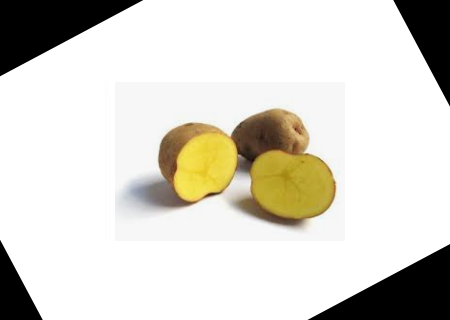

In [4]:
from PIL import Image
import IPython.display as display

image_path = 'Dataset/Train/freshpotato/p_f004.png'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

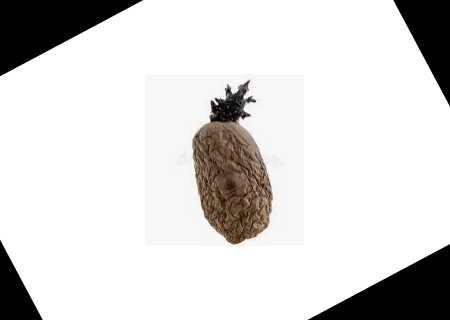

In [6]:
from PIL import Image
import IPython.display as display

image_path = 'Dataset/Train/rottenpotato/p_r006.png'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [14]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
train_generator = train_datagen.flow_from_directory('Dataset/Train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('Dataset/Validation',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 5021 images belonging to 4 classes.
Found 306 images belonging to 4 classes.


In [31]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (4, 4), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [37]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Only rescaling for validation
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    'Dataset/Train',
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    'Dataset/Validation',
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical'
)

# Model definition
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)


Found 5021 images belonging to 4 classes.
Found 306 images belonging to 4 classes.
Epoch 1/5
157/157 [==============================] - 160s 1s/step - loss: 0.8131 - accuracy: 0.7019 - val_loss: 0.3438 - val_accuracy: 0.8399
Epoch 2/5
157/157 [==============================] - 128s 811ms/step - loss: 0.3950 - accuracy: 0.8200 - val_loss: 0.2664 - val_accuracy: 0.8889
Epoch 3/5
157/157 [==============================] - 133s 844ms/step - loss: 0.3209 - accuracy: 0.8572 - val_loss: 0.2473 - val_accuracy: 0.8922
Epoch 4/5
157/157 [==============================] - 140s 889ms/step - loss: 0.2653 - accuracy: 0.8797 - val_loss: 0.2183 - val_accuracy: 0.9085
Epoch 5/5
157/157 [==============================] - 142s 901ms/step - loss: 0.2327 - accuracy: 0.8970 - val_loss: 0.2187 - val_accuracy: 0.8856


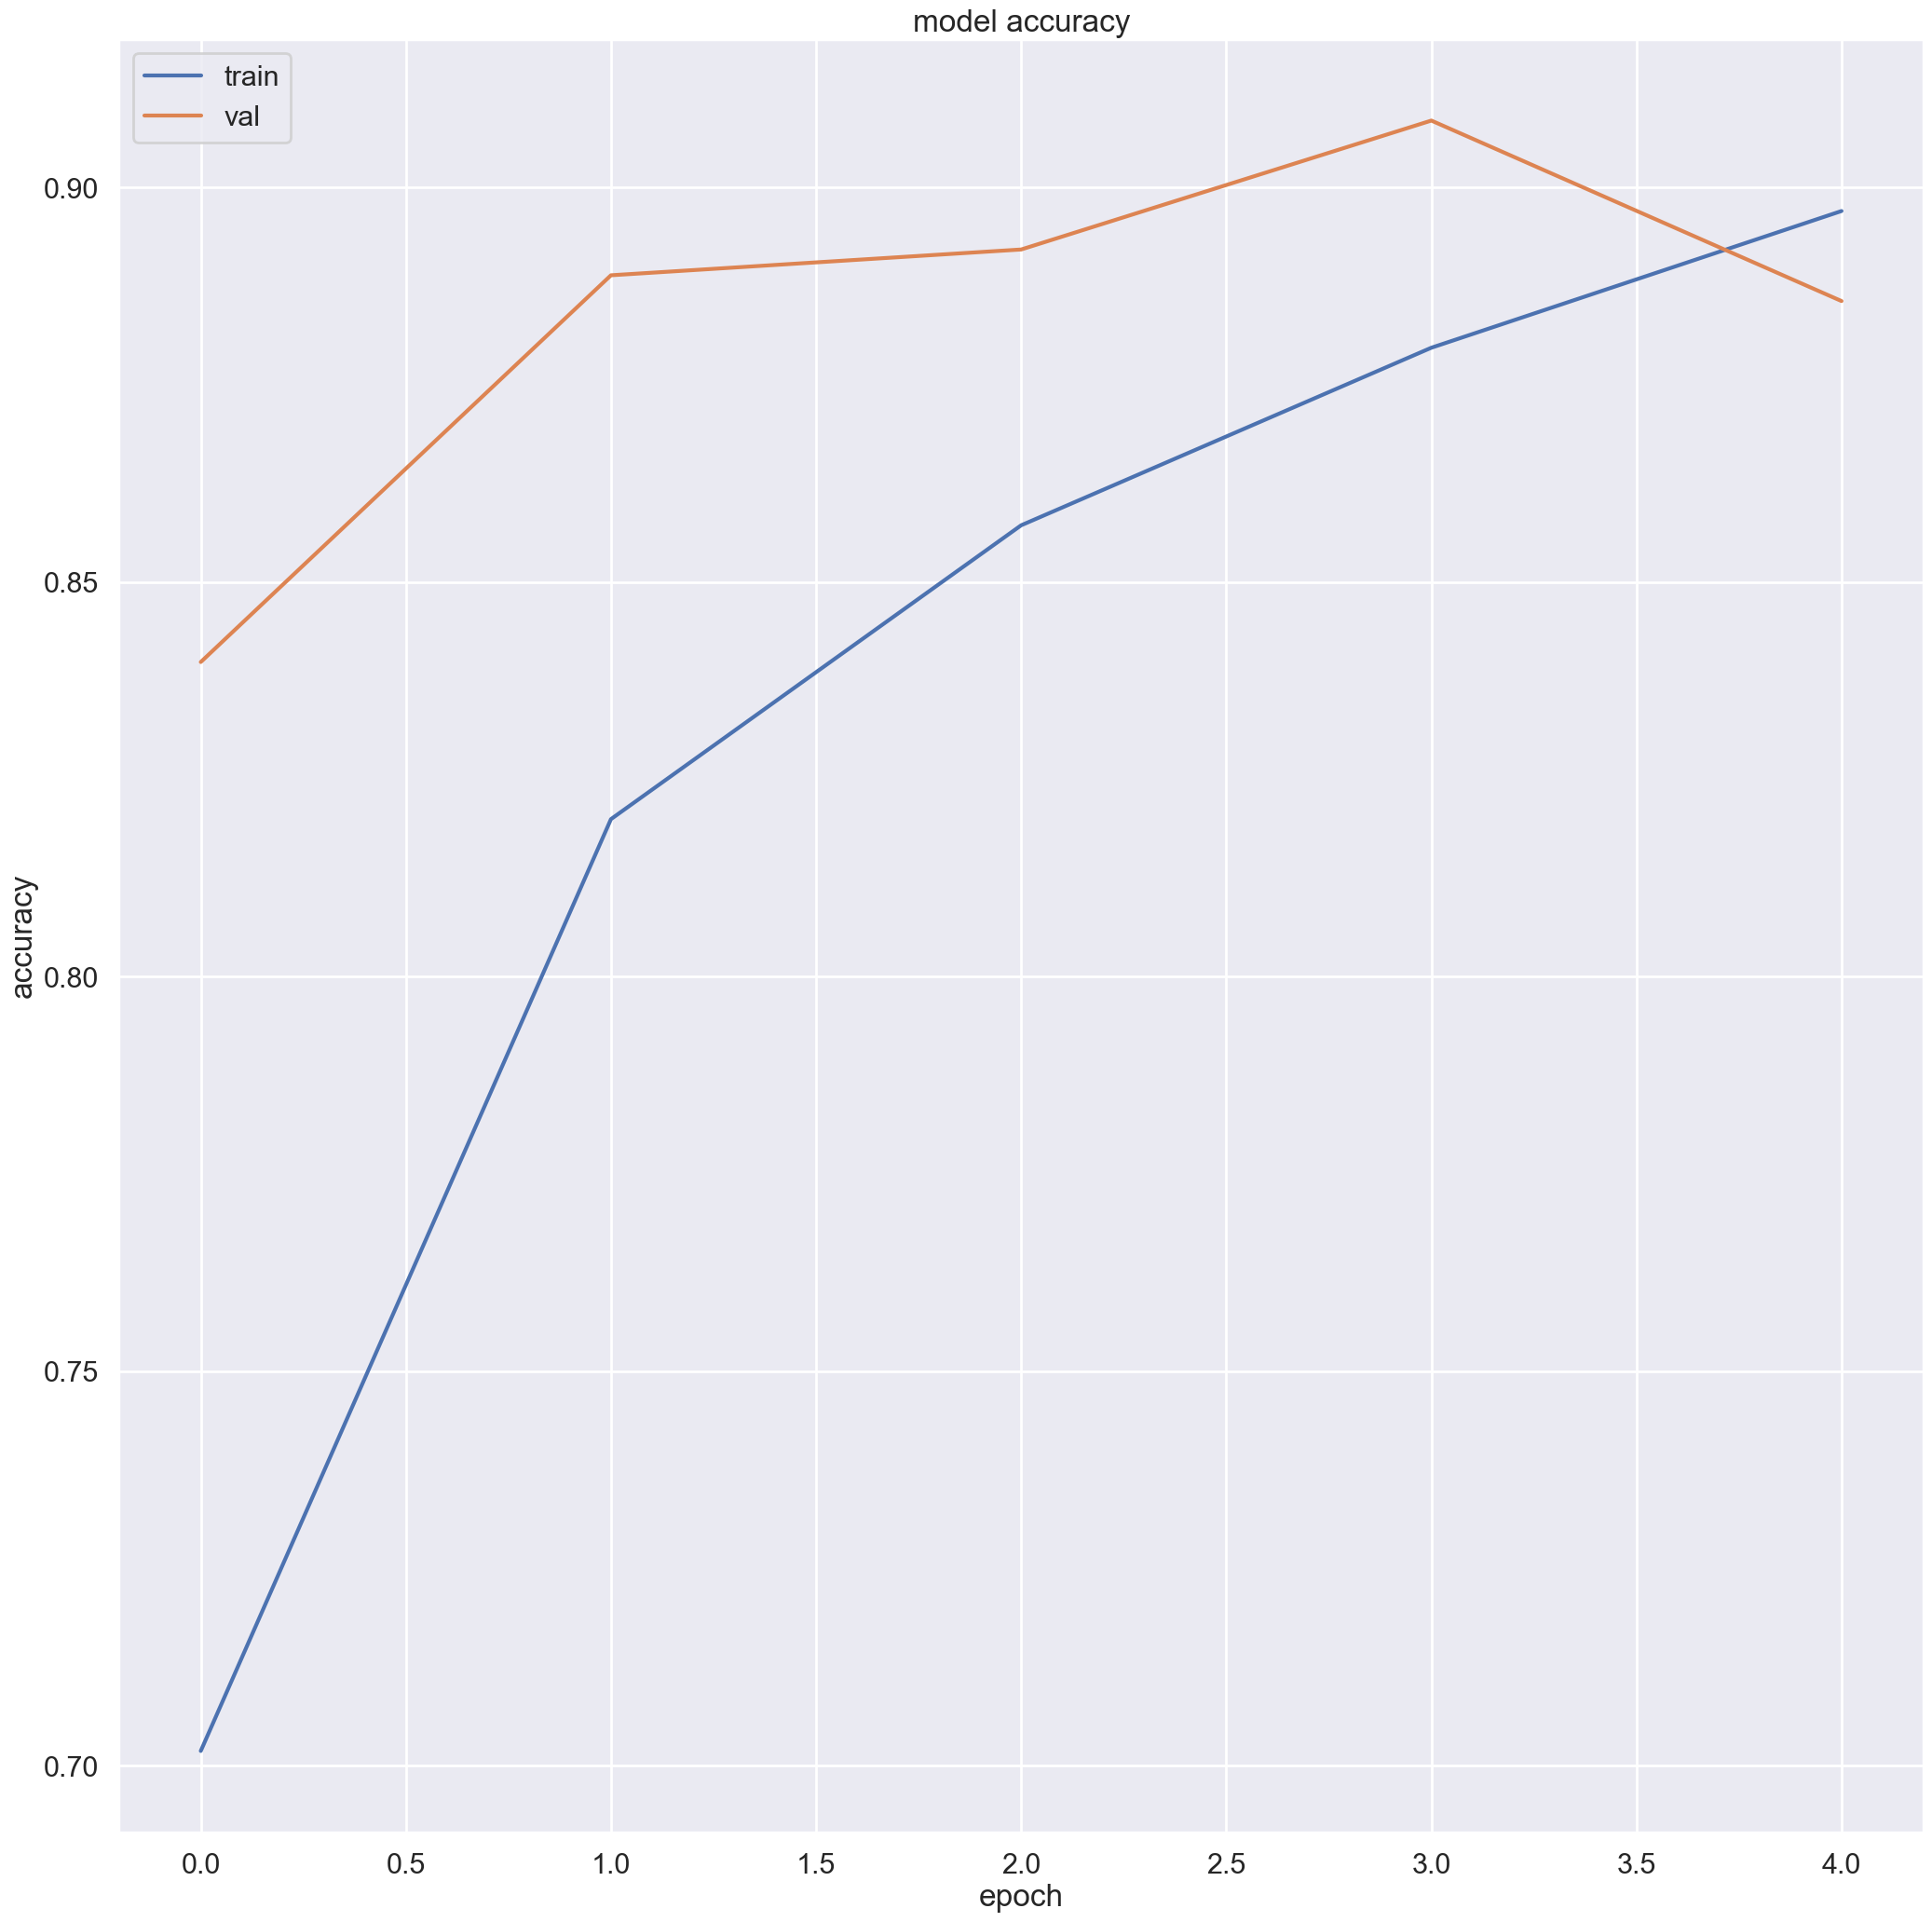

In [41]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [42]:
model.save("model.h5")

In [43]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image('Dataset/Test/rottenpotato/p_r001.png')

In [44]:
predictions = model.predict(x)
predictions[0]

1/1 [==============================] - 0s 116ms/step


array([1.84249952e-01, 2.23708366e-06, 8.15630198e-01, 1.17628966e-04],
      dtype=float32)

In [45]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'freshpotato', 1: 'freshtomato', 2: 'rottenpotato', 3: 'rottentomato'}

In [46]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

rottenpotato
